In [72]:
import os
os.chdir(r'C:\Users\Derrick\Documents\Scripts\Python\StockRelated\NasdaqNews')

In [73]:
path = os.getcwd()
FileList = os.listdir(path)

In [99]:
len(FileList)

633

In [75]:
import pandas as pd
Tickers = pd.DataFrame(FileList, columns = ['FileName'])

In [76]:
import numpy as np
Tickers['Ticker'] = np.NaN
Tickers['ExtractDate'] = np.NaN
Tickers[['Ticker','ExtractDate']] = Tickers['FileName'].str.split('_', expand=True)

Tickers['Ticker'] = Tickers['Ticker'].str.replace('NewsForNLP','')
Tickers['ExtractDate'] = Tickers['ExtractDate'].str.replace('.xlsx','')

In [77]:
Tickers.head()

,FileName,Ticker,ExtractDate
0,AABANewsForNLP_20181211.xlsx,AABA,20181211
1,AANNewsForNLP_20181212.xlsx,AAN,20181212
2,AAOINewsForNLP_20181217.xlsx,AAOI,20181217
3,AAPLNewsForNLP_20181217.xlsx,AAPL,20181217
4,ACIANewsForNLP_20181212.xlsx,ACIA,20181212


In [78]:
Tickers.Ticker.value_counts()

CBLK    1
EPAY    1
EIGI    1
ACY     1
SAIC    1
GSB     1
INOV    1
NETE    1
MSTR    1
NVEC    1
APPF    1
SIFY    1
RP      1
MODN    1
SGMA    1
PERI    1
CLPS    1
SPA     1
MTEC    1
OMCL    1
DATA    1
MJCO    1
IPDN    1
LECO    1
NXPI    1
SQNS    1
DDD     1
GILT    1
FSNN    1
PRFT    1
       ..
SXI     1
PCYG    1
ANY     1
BNFT    1
ZS      1
JOBS    1
TNC     1
EVBG    1
SPWR    1
ZDGE    1
FLEX    1
BILI    1
TRT     1
FSLR    1
JBL     1
SCKT    1
LIQT    1
LXFT    1
IMMR    1
SOL     1
ULTI    1
MAXR    1
EMAN    1
COUP    1
MPWR    1
MRVL    1
BRKS    1
KLIC    1
STAF    1
SNPS    1
Name: Ticker, dtype: int64

In [79]:
def getContent(fileName):
    xl = pd.ExcelFile(fileName)
    df = xl.parse(xl.sheet_names[0], skiprows=0)
    df['PublishedDate'] = df['PublishedDT'].dt.date
    df['PublishedTime'] = df['PublishedDT'].dt.time
    df['PublishedWeekDay'] = df['PublishedDT'].dt.dayofweek   # 0 is Monday, 6 is Sunday
    df['PublishedHour'] = df['PublishedDT'].dt.hour
    return df[['PublishedDate','PublishedWeekDay', 'PublishedTime','PublishedHour','Title','TickerInTitle', 'TickerInContent']]

In [80]:
dfList = []
for i in range(len(Tickers)):
    FileName = Tickers['FileName'][i]
    Ticker = Tickers['Ticker'][i]
    ExtractDate = Tickers['ExtractDate'][i]
    xldf = getContent(FileName)
    xldf['FileName'] =FileName
    xldf['Ticker'] =Ticker
    xldf['ExtractDate'] =ExtractDate
    dfList.append(xldf)

In [81]:
fnl = pd.concat(dfList, axis=0)

In [82]:
fnl.head()

,PublishedDate,PublishedWeekDay,PublishedTime,PublishedHour,Title,TickerInTitle,TickerInContent,FileName,Ticker,ExtractDate
0,2018-07-27,4.0,07:31:12,7.0,How Data Is Making The U.S. Stock Market Open ...,0,0,AABANewsForNLP_20181211.xlsx,AABA,20181211
1,2018-09-03,0.0,12:09:00,12.0,"Is Altaba, Inc. a Buy?",0,1,AABANewsForNLP_20181211.xlsx,AABA,20181211
2,2018-09-17,0.0,12:54:00,12.0,Altaba settles cases related to 2014 Yahoo bre...,0,0,AABANewsForNLP_20181211.xlsx,AABA,20181211
3,2018-09-27,3.0,16:16:46,16.0,Interesting AABA Put And Call Options For Nove...,1,1,AABANewsForNLP_20181211.xlsx,AABA,20181211
4,2018-10-22,0.0,14:57:00,14.0,Altaba offers half a map to Naspers' future,0,0,AABANewsForNLP_20181211.xlsx,AABA,20181211


In [83]:
fnl = fnl[fnl['PublishedWeekDay'].notnull()].reset_index(drop=True)

In [84]:
fnl['PublishedWeekDay'] = fnl['PublishedWeekDay'].astype(int)
fnl['PublishedHour'] = fnl['PublishedHour'].astype(int)


# When News are published

In [85]:
deduped = fnl[['PublishedWeekDay','PublishedHour','Title']].drop_duplicates()

In [86]:
deduped.groupby(['PublishedWeekDay','PublishedHour']).count().unstack().to_csv('Result.csv', index=True)

In [87]:
import os
os.chdir(r'C:\Users\Derrick\Documents\Scripts\Python\StockRelated')

In [89]:
deduped.groupby(['PublishedWeekDay','PublishedHour']).count().to_csv('Result1.csv', index=True)

In [90]:
deduped.head()

,PublishedWeekDay,PublishedHour,Title
0,4,7,How Data Is Making The U.S. Stock Market Open ...
1,0,12,"Is Altaba, Inc. a Buy?"
2,0,12,Altaba settles cases related to 2014 Yahoo bre...
3,3,16,Interesting AABA Put And Call Options For Nove...
4,0,14,Altaba offers half a map to Naspers' future


In [91]:
len(deduped)

98742

In [92]:
stats = deduped.groupby(['PublishedWeekDay','PublishedHour']).count()
stats= stats.reset_index()

In [97]:
stats = stats.rename(columns={'Title':'Count'})
stats.head()

,PublishedWeekDay,PublishedHour,Count
0,0,6,1279
1,0,7,1093
2,0,8,1350
3,0,9,1413
4,0,10,726


PublishedWeekDay
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Count, dtype: object

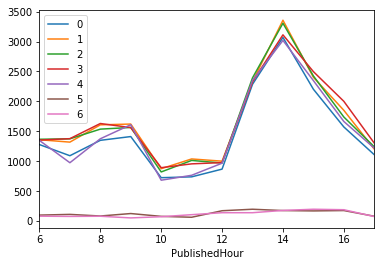

In [98]:
%matplotlib inline
dfs = stats[['PublishedWeekDay','PublishedHour','Count']].set_index('PublishedHour')
dfs.groupby('PublishedWeekDay')['Count'].plot(legend=True)

# Things to do
### 1. News-Stock network in Neo4j, color by sector
### 2. News publish timing (hours, weekday?) vs Close/Open or Close/Close up or down
### 3. Positive news vs Negative News sentiment analysis
### 4. Alert system